In [118]:
# Import dependencies 

import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import linregress
import seaborn as sn
from matplotlib.offsetbox import AnchoredText



In [159]:
# read in data file 
data_file = pd.read_csv('Amazon_EPC_data2.csv')
data_file.tail(10)

,Year,Week,Wk_Ending,Organic Search,Non-Search,Total Clicks,% Search,Products Ordered,Ordered Revenue,AOV,Conversion Rate,Linked,Halo,Halo to Linked Purchases,Shipped Revenue,Earnings,EPC,Commission Rate
165,2022,10,3/6/2022,432831,323748,756579,0.57,206855,8759700,42,0.273,73182,133673,1.83,7882598,525168,0.69,0.067
166,2022,11,3/13/2022,433066,287814,720880,0.60,201495,8672739,43,0.280,70885,130610,1.84,7787628,513797,0.71,0.066
167,2022,12,3/20/2022,426098,293957,720055,0.59,195599,8632426,44,0.272,69159,126440,1.83,7897948,523338,0.73,0.066
168,2022,13,3/27/2022,416138,238299,654437,0.64,188772,8498797,45,0.288,65740,123032,1.87,7733774,512625,0.78,0.066
169,2022,14,4/3/2022,407603,232185,639788,0.64,184414,8327766,45,0.288,63814,120600,1.89,7457674,495655,0.77,0.066
170,2022,15,4/10/2022,428495,270189,698684,0.61,201212,8996922,45,0.288,69171,132041,1.91,8122788,549266,0.79,0.068
171,2022,16,4/17/2022,412116,235292,647408,0.64,197319,8586291,44,0.305,67585,129734,1.92,7927362,530886,0.82,0.067
172,2022,17,4/24/2022,434495,241249,675744,0.64,205038,9128183,45,0.303,72697,132341,1.82,8195859,553154,0.82,0.067
173,2022,18,5/1/2022,434482,226335,660817,0.66,197123,9187011,47,0.298,65706,131417,2.00,8269102,560469,0.85,0.068
174,2022,19,5/8/2022,428257,245006,673263,0.64,208179,9834810,47,0.309,72759,135420,1.86,8968228,606648,0.90,0.068


## Correlation Matrix

In [73]:
df = pd.DataFrame(data_file,columns=['Organic Search','Non-Search','Total Clicks','% Search','Products Ordered','Ordered Revenue','AOV','Conversion Rate','Linked','Halo','Shipped Revenue','Earnings','EPC','Commission Rate'])


In [75]:
corrMatrix = df.corr()
corrMatrix.to_excel('file_name.xlsx')
# print (corrMatrix)


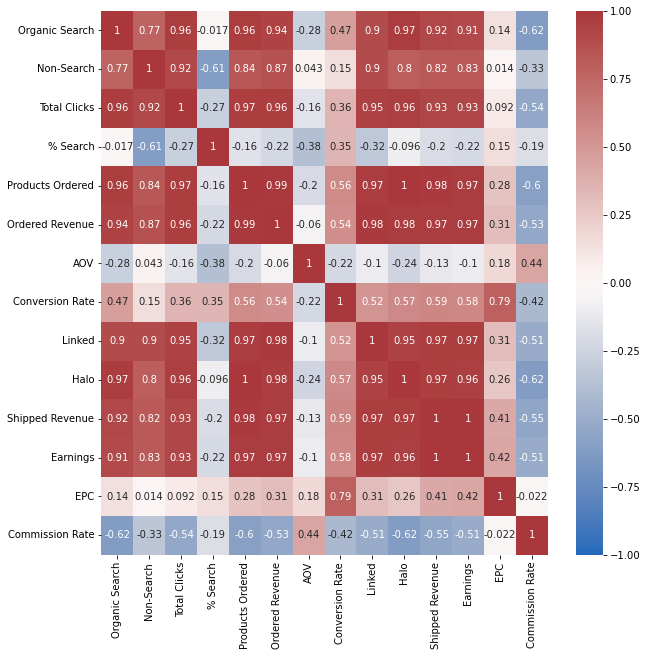

In [76]:
fig, ax = plt.subplots(figsize=(10,10)) 
sn.heatmap(corrMatrix, annot=True, xticklabels='auto', yticklabels='auto',ax=ax, vmax=1, vmin=-1, center=0 ,cmap='vlag')
plt.savefig('heatmap.png', bbox_inches="tight")
plt.show()





## Matrix with only strong correlations

In [77]:
df3 = df.copy(deep='false')
matrix = df3.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.5]
matrix.to_excel('high_correlation.xlsx')
print(matrix)

Organic Search   Organic Search      1.000000
                 Non-Search          0.774477
                 Total Clicks        0.962086
                 Products Ordered    0.962165
                 Ordered Revenue     0.938726
                                       ...   
Commission Rate  Linked             -0.514236
                 Halo               -0.622617
                 Shipped Revenue    -0.553980
                 Earnings           -0.511540
                 Commission Rate     1.000000
Length: 118, dtype: float64


## Matrix with only weak correlations

In [78]:
df4 = df.copy(deep='false')
matrix4 = df4.corr()
matrix4 = matrix4.unstack()
matrix4 = matrix4[abs(matrix4) < 0.5]
matrix4.to_excel('low_correlation.xlsx')
print(matrix4)

Organic Search   % Search          -0.017291
                 AOV               -0.277917
                 Conversion Rate    0.467709
                 EPC                0.136517
Non-Search       AOV                0.042732
                                      ...   
Commission Rate  Non-Search        -0.332083
                 % Search          -0.187449
                 AOV                0.437019
                 Conversion Rate   -0.419325
                 EPC               -0.021782
Length: 78, dtype: float64


## Plot Regression line 

### Shipped Revenue VS Search 

In [8]:
shipped_revenue = df["Shipped Revenue"].tolist()
search = df['Organic Search'].tolist()

In [9]:
shipped_revenue = [int(x) for x in shipped_revenue] 
search = [int(x) for x in search] 

In [10]:
linregress(search,shipped_revenue)
# linregress.to_excel('search_vs_revenue.xlsx')

LinregressResult(slope=17.39025497248053, intercept=-603602.7237826567, rvalue=0.9150572746296829, pvalue=3.9673336473006944e-70, stderr=0.5827584764214728, intercept_stderr=284714.3393057933)

In [11]:
# Save the results as a touple 
(slope, intercept, rval, pval, stderr) = linregress(search,shipped_revenue)

# get the equation of the line 

line_eq = (f"y = {round(slope,5)}x + {round(intercept,3)}")
print(f"The equation of the line is:")
print(line_eq)
print(f"The p-value is: {pval:.3f}")
print(f"The r-value is: {rval:.3f}")

The equation of the line is:
y = 17.39025x + -603602.724
The p-value is: 0.000
The r-value is: 0.915


In [12]:
# Obtain regress values by plugging in values in the equation of line formula 
regress_values = [(search * slope + intercept ) for search in search]

In [13]:
nl = '\n'
annotation = (f"r_value= {rval:.3f}{nl}p_value= {pval:.3f}")

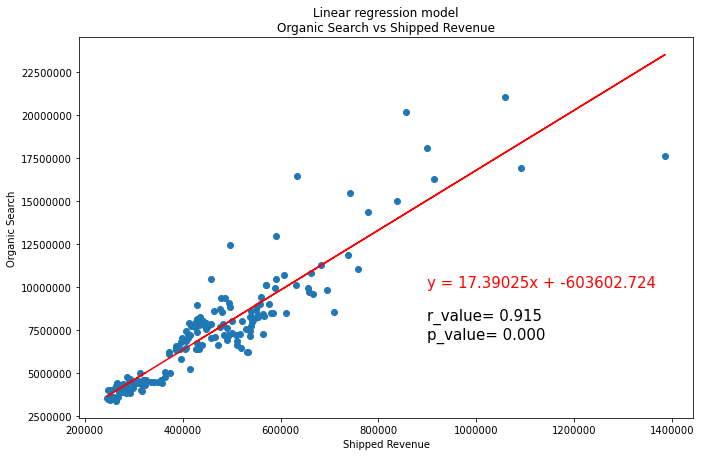

In [14]:
# Plot regression model 
# Create a scatter plot of the x and y values.
plt.figure(figsize=(11,7))
plt.scatter(search,shipped_revenue)
plt.ticklabel_format(style='plain')
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(search, regress_values, "r")
plt.annotate(line_eq, (900000,10000000), fontsize=15, color="red")
plt.annotate(annotation, (900000,7000000), fontsize=15, color="black")
plt.title(f"Linear regression model{nl}Organic Search vs Shipped Revenue")
plt.ylabel('Organic Search')
plt.xlabel('Shipped Revenue')
plt.savefig("search_revenue.jpg")
plt.show()

### Total Clicks VS Shipped Revenue

In [48]:
total_clicks = df["Total Clicks"].tolist()
o_search = df['Organic Search'].tolist()

In [49]:
shipped_revenue = [int(x) for x in total_clicks ] 
o_search = [int(x) for x in o_search] 

In [50]:
linregress(o_search,total_clicks)


LinregressResult(slope=1.5315719546946547, intercept=-33015.81538461044, rvalue=0.9620858060308886, pvalue=1.5322905811919886e-99, stderr=0.03301113510604511, intercept_stderr=16128.025420010168)

In [52]:
(slope, intercept, rval, pval, stderr) = linregress(search,total_clicks)

# get the equation of the line 

line_eq = (f"y = {round(slope,5)}x + {round(intercept,3)}")
print(f"The equation of the line is:")
print(line_eq)
print(f"The p-value is: {pval:.3f}")
print(f"The r-value is: {rval:.3f}")

The equation of the line is:
y = 1.53157x + -33015.815
The p-value is: 0.000
The r-value is: 0.962


In [53]:
# Obtain regress values by plugging in values in the equation of line formula 
regress_values2 = [(o_search * slope + intercept ) for o_search in o_search]

In [54]:
nl = '\n'
annotation = (f"r_value= {rval:.3f}{nl}p_value= {pval:.3f}")

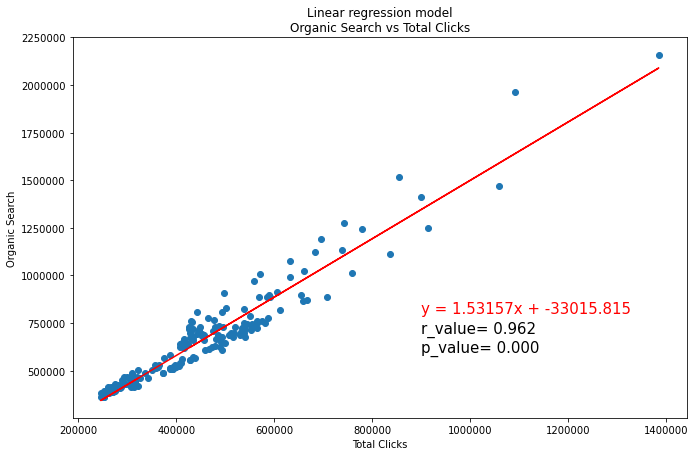

In [56]:
plt.figure(figsize=(11,7))
plt.scatter(search,shipped_revenue)
plt.ticklabel_format(style='plain')
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(search, regress_values2, "r")
plt.annotate(line_eq, (900000,800000), fontsize=15, color="red")
plt.annotate(annotation, (900000,600000), fontsize=15, color="black")
plt.title(f"Linear regression model{nl}Organic Search vs Total Clicks")
plt.ylabel('Organic Search')
plt.xlabel('Total Clicks')
plt.savefig("search_clicks.jpg")
plt.show()

In [80]:
PO = df["Products Ordered"].tolist()
OSC = df['Organic Search'].tolist()
PO = [float(x) for x in PO] 
OSC = [float(x) for x in OSC] 

In [81]:
linregress(OSC,PO)

LinregressResult(slope=0.5085803350580215, intercept=-35587.75563253477, rvalue=0.9621651296345648, pvalue=1.2827618702390477e-99, stderr=0.010949664198106316, intercept_stderr=5349.602852502185)

In [82]:
(slope, intercept, rval, pval, stderr) = linregress(OSC,PO)

# get the equation of the line 

line_eq = (f"y = {round(slope,5)}x + {round(intercept,3)}")
print(f"The equation of the line is:")
print(line_eq)
print(f"The p-value is: {pval:.3f}")
print(f"The r-value is: {rval:.3f}")

The equation of the line is:
y = 0.50858x + -35587.756
The p-value is: 0.000
The r-value is: 0.962


In [148]:
# Obtain regress values by plugging in values in the equation of line formula 
regress_values3 = [( OSC * slope + intercept ) for OSC in OSC]
nl = '\n'
annotation = (f"r_value= {rval:.3f}{nl}p_value= {pval:.3f}")

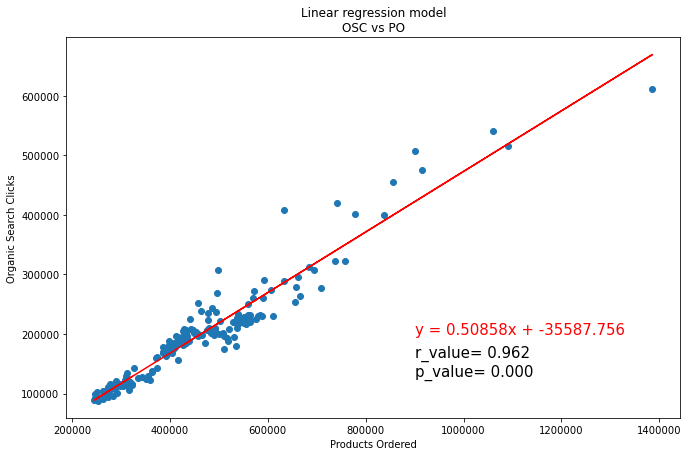

In [94]:
plt.figure(figsize=(11,7))
plt.scatter(OSC,PO)
plt.ticklabel_format(style='plain')
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(OSC, regress_values3, "r")
plt.annotate(line_eq, (900000,200000), fontsize=15, color="red")
plt.annotate(annotation, (900000,130000), fontsize=15, color="black")
plt.title(f"Linear regression model{nl}OSC vs PO")
plt.ylabel('Organic Search Clicks')
plt.xlabel('Products Ordered')
plt.savefig("OSC_PO.jpg")
plt.show()

## Function for linear regressions

In [150]:

def Amazon_Var(ind,dep):
    nl = '\n'
    X = df[dep].tolist()
    Y = df[ind].tolist()
    X = [int(X) for X in X] 
    Y = [int(Y) for Y in Y] 
    linregress(Y,X)
    (slope, intercept, rval, pval, stderr) = linregress(Y,X)
    regress_values = [( Y * slope + intercept ) for Y in Y]
    annotation = (f"r_value= {rval:.3f}{nl}p_value= {pval:.3f}{nl}{line_eq}")
    fig, ax = plt.subplots(figsize=(11,7))
    at = AnchoredText(
    annotation, prop=dict(size=15), frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)
    plt.scatter(Y,X)
    plt.ticklabel_format(style='plain')
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(Y, regress_values, "r")
#     plt.annotate(line_eq, (900000,200000), fontsize=15, color="red")
#     plt.annotate(annotation, (900000,130000), fontsize=15, color="black")
    plt.title(f"Linear regression model{nl} {ind} vs {dep}")
    plt.ylabel(f'{ind}')
    plt.xlabel(f'{dep}')
    plt.savefig(f"{ind}_{dep}.jpg")
    plt.show()
    

    return 
    

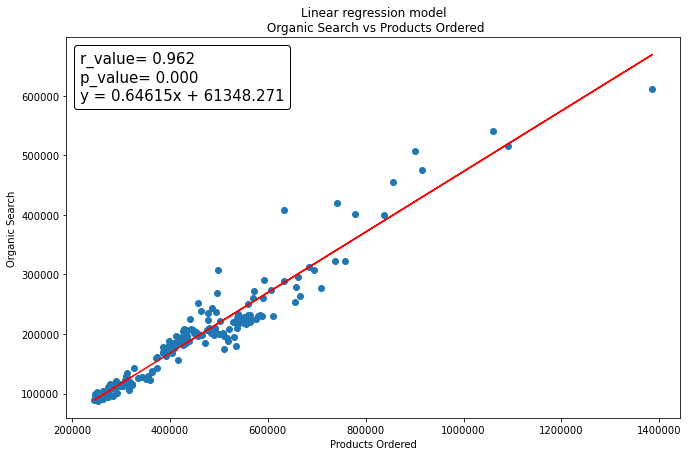

In [151]:
ind =  "Organic Search"
dep =  "Products Ordered"
Amazon_Var(ind,dep)

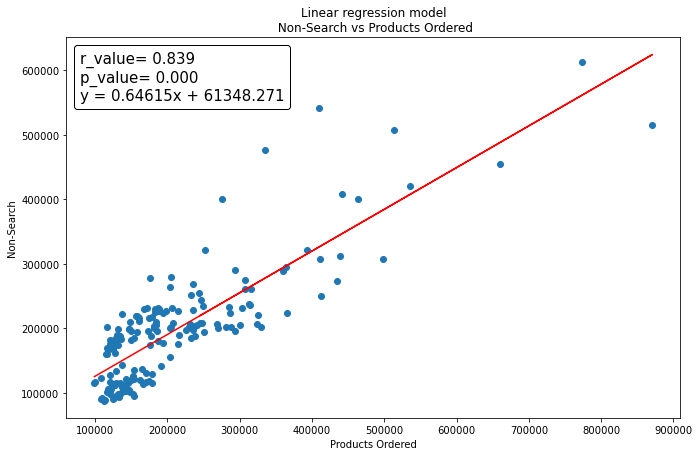

In [154]:
ind =  "Non-Search"
dep =  "Products Ordered"
Amazon_Var(ind,dep)

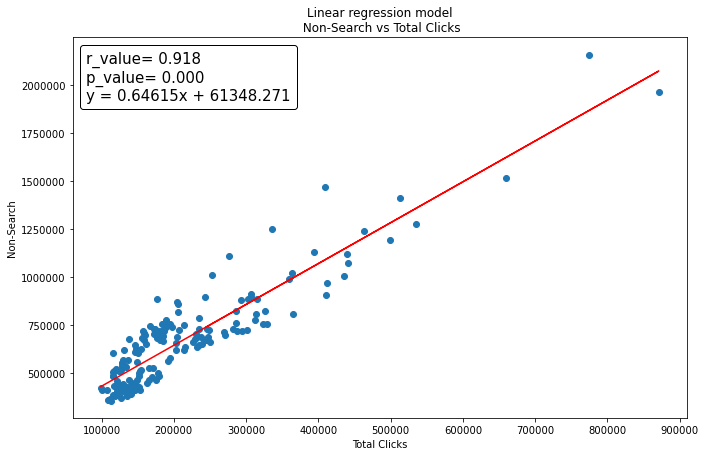

In [156]:
ind =  "Non-Search"
dep =  "Total Clicks"
Amazon_Var(ind,dep)

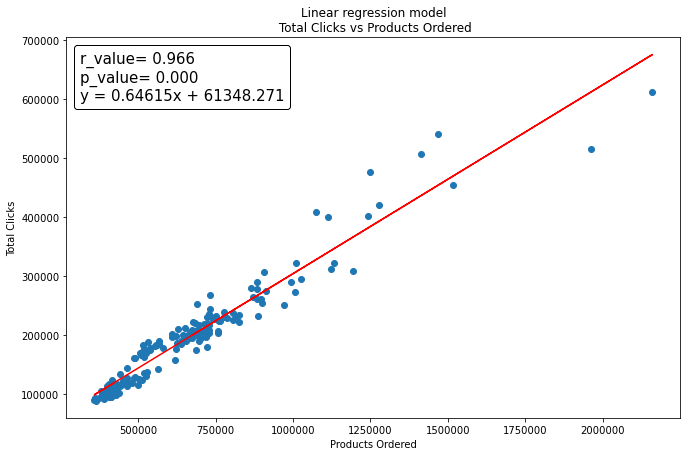

In [157]:
ind =  "Total Clicks"
dep =  "Products Ordered"
Amazon_Var(ind,dep)